# Import Libraries

In [1]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y, epochs=50, batch_size=32, verbose=1):
        input_dim = X.shape[1]
        self.model = Sequential()
        self.model.add(Dense(128, activation='relu', input_dim=input_dim))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(1))
        self.model.compile(optimizer='adam', loss='mse')
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

In [3]:
data = pd.read_csv("3w.csv")

# Feature Engineering

In [4]:
data['interaction'] = data['CF(PCU/min)'] * data['%_of_4W']
data['interaction*2'] = data['CF*2(PCU/min)'] * data['%_of_4W*2']

In [5]:
features = data[['CF(PCU/min)', 'CF*2(PCU/min)', '%_of_4W', '%_of_4W*2', 'interaction', 'interaction*2']].values
target = data['SD'].values

In [6]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [9]:
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model, rf_params, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [10]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [11]:
print(f'Best Random Forest Regressor R2 Score: {r2_rf:.4f}')
print(f'Best Random Forest Regressor Hyperparameters: {grid_search_rf.best_params_}')

Best Random Forest Regressor R2 Score: 0.6695
Best Random Forest Regressor Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 200}


In [12]:
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
gb_model = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(gb_model, gb_params, cv=5, scoring='r2')
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [14]:
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

In [15]:
print(f'Best Gradient Boosting Regressor R2 Score: {r2_gb:.4f}')
print(f'Best Gradient Boosting Regressor Hyperparameters: {grid_search_gb.best_params_}')

Best Gradient Boosting Regressor R2 Score: 0.6722
Best Gradient Boosting Regressor Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [16]:
svr_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [17]:
svr_model = SVR()
grid_search_svr = GridSearchCV(svr_model, svr_params, cv=5, scoring='r2')
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='r2')

In [18]:
best_svr_model = grid_search_svr.best_estimator_
y_pred_svr = best_svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

In [19]:
print(f'Best Support Vector Regressor R2 Score: {r2_svr:.4f}')
print(f'Best Support Vector Regressor Hyperparameters: {grid_search_svr.best_params_}')

Best Support Vector Regressor R2 Score: 0.6878
Best Support Vector Regressor Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [20]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

In [21]:
xgb_model = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='r2')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [22]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [23]:
print(f'Best XGBoost Regressor R2 Score: {r2_xgb:.4f}')
print(f'Best XGBoost Regressor Hyperparameters: {grid_search_xgb.best_params_}')

Best XGBoost Regressor R2 Score: 0.6616
Best XGBoost Regressor Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}


In [24]:
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [25]:
adaboost_model = AdaBoostRegressor()
grid_search_adaboost = GridSearchCV(adaboost_model, adaboost_params, cv=5, scoring='r2')
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [26]:
best_adaboost_model = grid_search_adaboost.best_estimator_
y_pred_adaboost = best_adaboost_model.predict(X_test)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)

In [27]:
print(f'Best AdaBoost Regressor R2 Score: {r2_adaboost:.4f}')
print(f'Best AdaBoost Regressor Hyperparameters: {grid_search_adaboost.best_params_}')

Best AdaBoost Regressor R2 Score: 0.6670
Best AdaBoost Regressor Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 100}


In [28]:
lgbm_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [29]:
lgbm_model = LGBMRegressor()
grid_search_lgbm = GridSearchCV(lgbm_model, lgbm_params, cv=5, scoring='r2')
grid_search_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 6
[LightGBM] [Info] Start training from score 18.718894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [30]:
best_lgbm_model = grid_search_lgbm.best_estimator_
y_pred_lgbm = best_lgbm_model.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

In [31]:
print(f'Best LightGBM Regressor R2 Score: {r2_lgbm:.4f}')
print(f'Best LightGBM Regressor Hyperparameters: {grid_search_lgbm.best_params_}')

Best LightGBM Regressor R2 Score: 0.6798
Best LightGBM Regressor Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [32]:
nn_regressor = KerasRegressor()
nn_regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

KerasRegressor()

In [33]:
y_pred_nn = nn_regressor.predict(X_test)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)

3/3 [==============================] - 0s 0s/step


In [34]:
print(f'Neural Network R2 Score: {r2_nn:.4f}')

Neural Network R2 Score: 0.6749


In [35]:
knn_params = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [36]:
knn_model = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn_model, knn_params, cv=5, scoring='r2')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [37]:
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

In [38]:
print(f'Best K-Nearest Neighbors Regressor R2 Score: {r2_knn:.4f}')
print(f'Best K-Nearest Neighbors Regressor Hyperparameters: {grid_search_knn.best_params_}')

Best K-Nearest Neighbors Regressor R2 Score: 0.6766
Best K-Nearest Neighbors Regressor Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}


In [39]:
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
dt_model = DecisionTreeRegressor()
grid_search_dt = GridSearchCV(dt_model, dt_params, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [41]:
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [42]:
print(f'Best Decision Tree Regressor R2 Score: {r2_dt:.4f}')
print(f'Best Decision Tree Regressor Hyperparameters: {grid_search_dt.best_params_}')

Best Decision Tree Regressor R2 Score: 0.6186
Best Decision Tree Regressor Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [43]:
mlp_params = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

In [44]:
mlp_model = MLPRegressor(max_iter=500)
grid_search_mlp = GridSearchCV(mlp_model, mlp_params, cv=5, scoring='r2')
grid_search_mlp.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization has

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=500),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(64, 32), (128, 64, 32)]},
             scoring='r2')

In [45]:
best_mlp_model = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

In [46]:
print(f'Best MLP Regressor R2 Score: {r2_mlp:.4f}')
print(f'Best MLP Regressor Hyperparameters: {grid_search_mlp.best_params_}')

Best MLP Regressor R2 Score: 0.6916
Best MLP Regressor Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32)}


In [47]:
estimators = [
    ('random_forest', best_rf_model),
    ('gradient_boosting', best_gb_model),
    ('support_vector', best_svr_model),
    ('xgboost', best_xgb_model),
    ('adaboost', best_adaboost_model),
    ('lgbm', best_lgbm_model),
    ('neural_network', nn_regressor),
    ('knn', best_knn_model),
    ('decision_tree', best_dt_model),
    ('mlp', best_mlp_model)
]

In [48]:
stacked_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())

In [49]:
cross_val_r2 = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='r2')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 6
[LightGBM] [Info] Start training from score 18.718894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [50]:
highest_r2 = np.max(cross_val_r2)

In [51]:
print(f'Cross-validated R2 Score: {highest_r2:.4f}')

Cross-validated R2 Score: 0.7021


In [52]:
best_regressor = None
best_r2 = -float('inf')


In [53]:
for name, model in estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_regressor = model
        best_y_pred = y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 6
[LightGBM] [Info] Start training from score 18.860294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


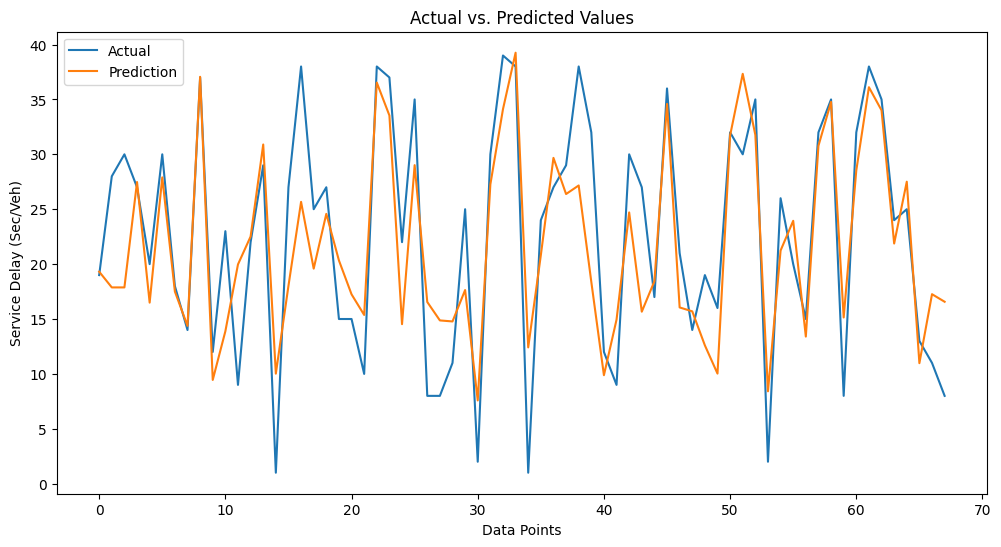

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(best_y_pred, label='Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

In [55]:
models = ['Random Forest', 'Gradient Boosting', 'Support Vector', 'XGBoost', 'AdaBoost', 'LightGBM', 'Neural Network', 'K-Nearest Neighbors', 'Decision Tree', 'MLP']
mae_values = [mae_rf, mae_gb, mae_svr, mae_xgb, mae_adaboost, mae_lgbm, mae_nn, mae_knn, mae_dt, mae_mlp]
mse_values = [mse_rf, mse_gb, mse_svr, mse_xgb, mse_adaboost, mse_lgbm, mse_nn, mse_knn, mse_dt, mse_mlp]
r2_values = [r2_rf, r2_gb, r2_svr, r2_xgb, r2_adaboost, r2_lgbm, r2_nn, r2_knn, r2_dt, r2_mlp]

In [56]:
for model, mae, mse, r2 in zip(models, mae_values, mse_values, r2_values):
    print(f'Model: {model}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    print('-' * 40)

Model: Random Forest
Mean Absolute Error (MAE): 4.8445
Mean Squared Error (MSE): 37.6235
R2 Score: 0.6695
----------------------------------------
Model: Gradient Boosting
Mean Absolute Error (MAE): 4.6898
Mean Squared Error (MSE): 37.3111
R2 Score: 0.6722
----------------------------------------
Model: Support Vector
Mean Absolute Error (MAE): 4.7013
Mean Squared Error (MSE): 35.5453
R2 Score: 0.6878
----------------------------------------
Model: XGBoost
Mean Absolute Error (MAE): 4.7853
Mean Squared Error (MSE): 38.5238
R2 Score: 0.6616
----------------------------------------
Model: AdaBoost
Mean Absolute Error (MAE): 4.8800
Mean Squared Error (MSE): 37.9029
R2 Score: 0.6670
----------------------------------------
Model: LightGBM
Mean Absolute Error (MAE): 4.9153
Mean Squared Error (MSE): 36.4556
R2 Score: 0.6798
----------------------------------------
Model: Neural Network
Mean Absolute Error (MAE): 4.9281
Mean Squared Error (MSE): 37.0032
R2 Score: 0.6749
----------------------

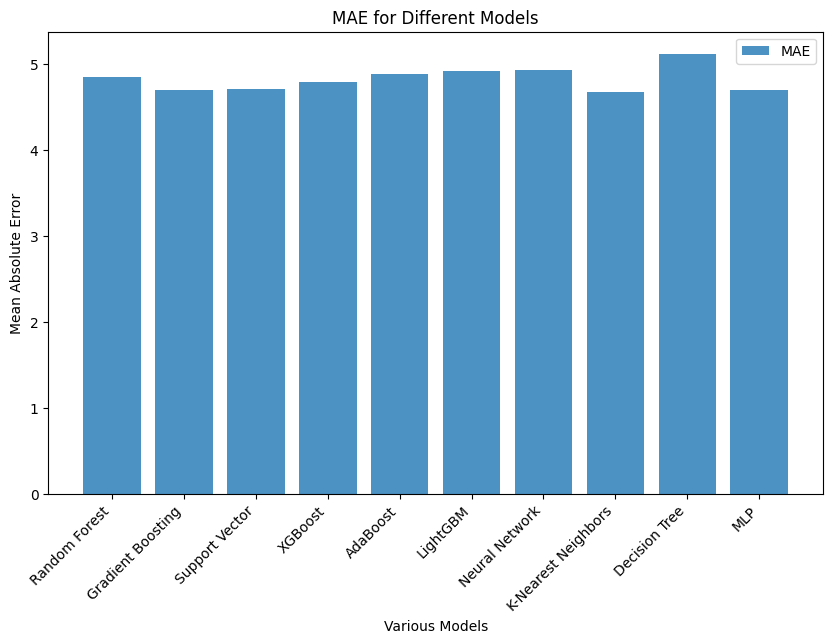

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

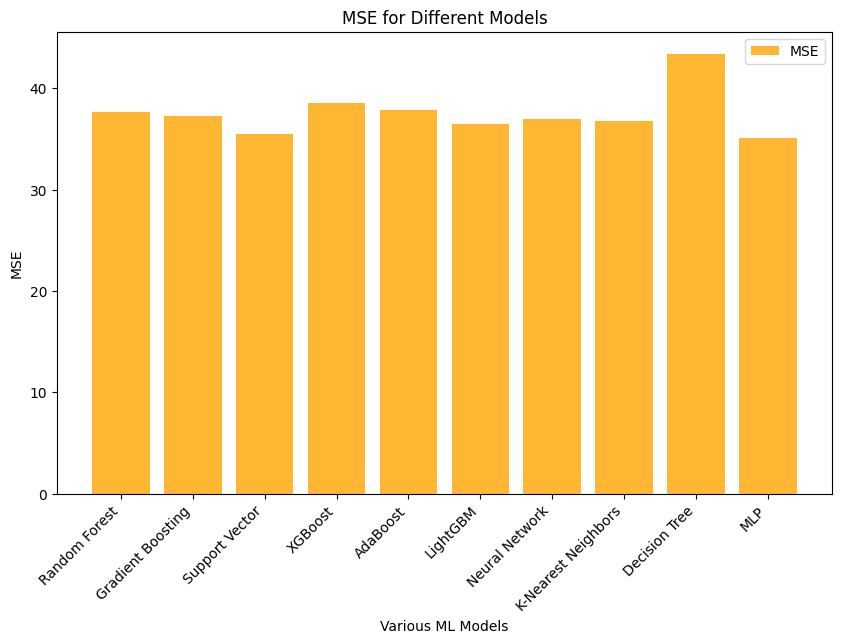

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='MSE', color='orange')
plt.title('MSE for Different Models')
plt.ylabel('MSE')
plt.xlabel('Various ML Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

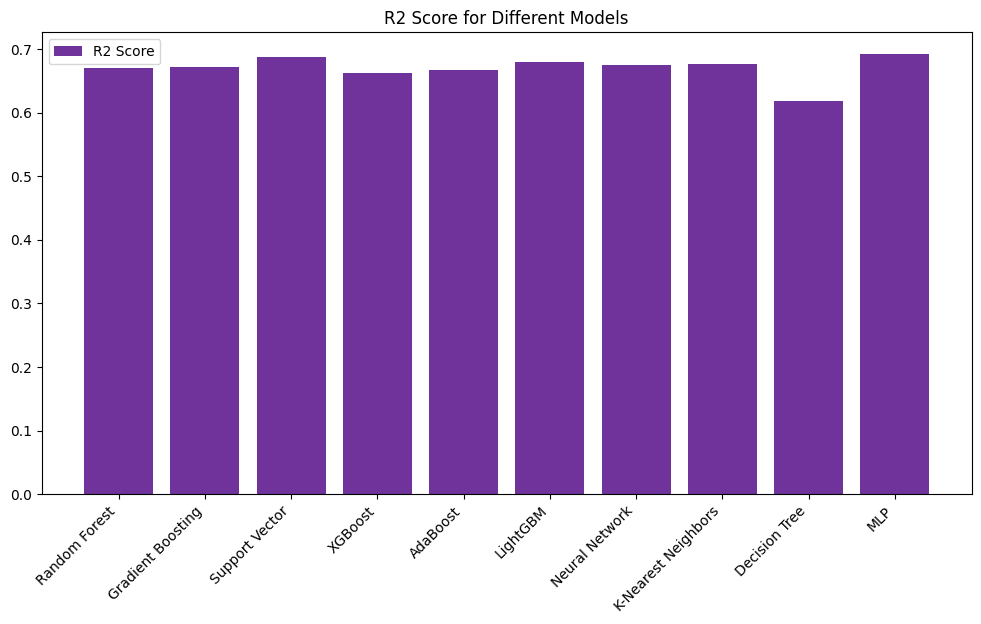

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


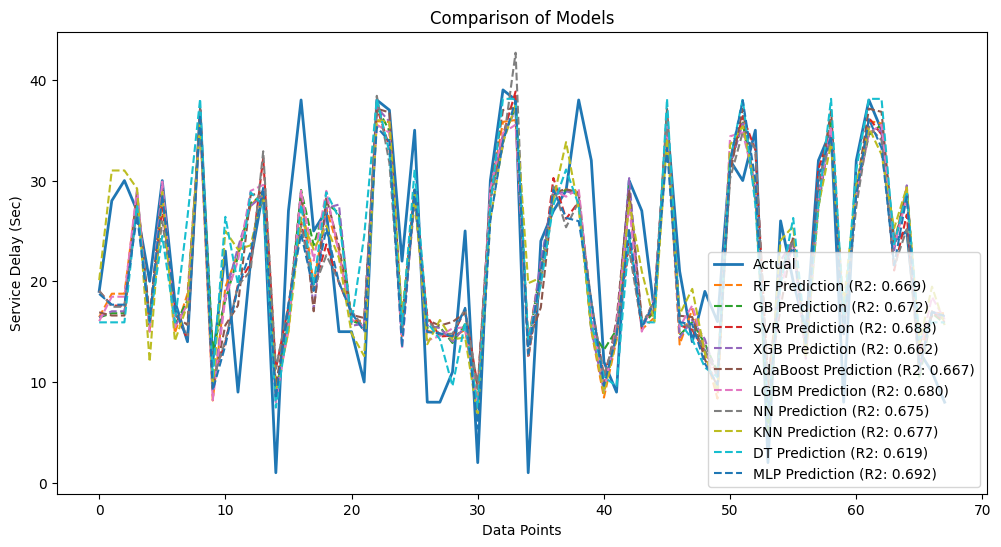

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_rf, label=f'RF Prediction (R2: {r2_rf:.3f})', linestyle='dashed')
plt.plot(y_pred_gb, label=f'GB Prediction (R2: {r2_gb:.3f})', linestyle='dashed')
plt.plot(y_pred_svr, label=f'SVR Prediction (R2: {r2_svr:.3f})', linestyle='dashed')
plt.plot(y_pred_xgb, label=f'XGB Prediction (R2: {r2_xgb:.3f})', linestyle='dashed')
plt.plot(y_pred_adaboost, label=f'AdaBoost Prediction (R2: {r2_adaboost:.3f})', linestyle='dashed')
plt.plot(y_pred_lgbm, label=f'LGBM Prediction (R2: {r2_lgbm:.3f})', linestyle='dashed')
plt.plot(y_pred_nn, label=f'NN Prediction (R2: {r2_nn:.3f})', linestyle='dashed')
plt.plot(y_pred_knn, label=f'KNN Prediction (R2: {r2_knn:.3f})', linestyle='dashed')
plt.plot(y_pred_dt, label=f'DT Prediction (R2: {r2_dt:.3f})', linestyle='dashed')
plt.plot(y_pred_mlp, label=f'MLP Prediction (R2: {r2_mlp:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models')
plt.show()

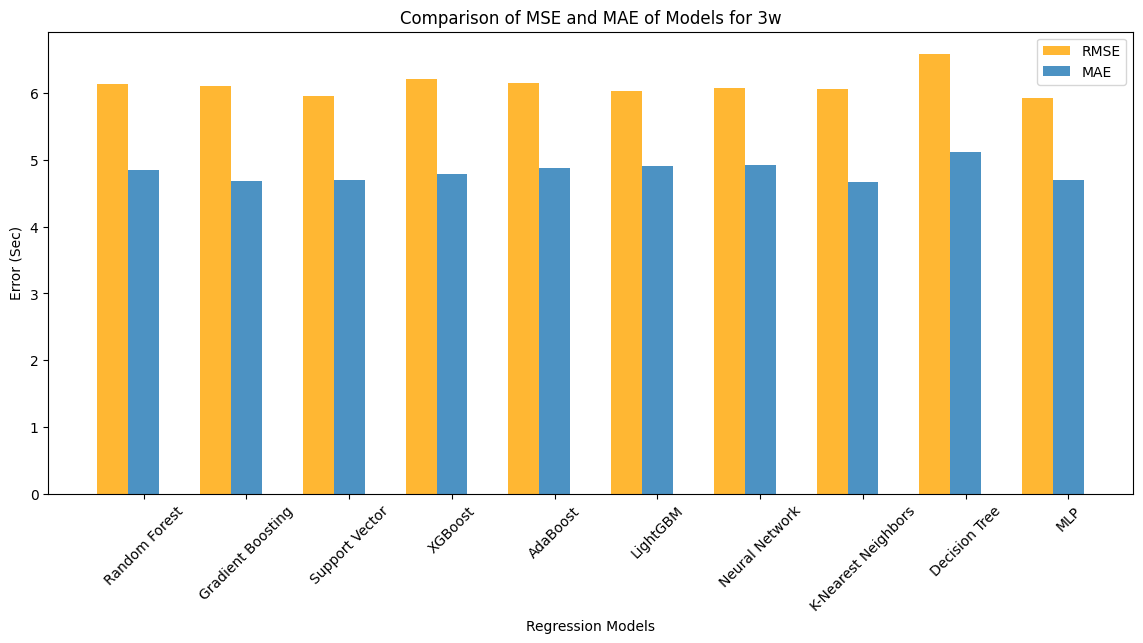

In [61]:
mse_values = np.sqrt([mse_rf, mse_gb, mse_svr, mse_xgb, mse_adaboost, mse_lgbm, mse_nn, mse_knn, mse_dt, mse_mlp])
bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('Regression Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of MSE and MAE of Models for 3w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()